In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import RepeatedKFold


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
#from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor


from ngboost.ngboost import NGBoost
from ngboost.learners import default_tree_learner
import lightgbm
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.datasets import make_regression

from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import statsmodels.api as sm
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge




# from numpy import asarray
# from numpy import mean
# from numpy import std
#from sklearn.metrics import mean_squared_error





from sklearn.pipeline import make_pipeline
#from sklearn.experimental import enable_hist_gradient_boosting  # noqa


from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm
import time


from ngboost.ngboost import NGBoost
from ngboost.learners import default_tree_learner
from ngboost.distns import Normal
from ngboost.scores import MLE
import lightgbm as lgb
import xgboost as xgb
from math import sqrt

from matplotlib import pyplot

In [2]:
df = pd.read_csv('Essai.csv')

In [3]:
df.head()

,Marque,Modele,prix,annee,kilometrage,carburant
0,Volkswagen,Passat,27.0,13,224.000,Diesel
1,Volkswagen,Polo,24.3,10,177.150,Essence
2,Volkswagen,Passat,35.0,12,280.000,Diesel
3,Volkswagen,Transporter,13.5,22,11.111,Diesel
4,Volkswagen,Golf 7,45.0,6,102.400,Essence


### The analysis of the variable modele

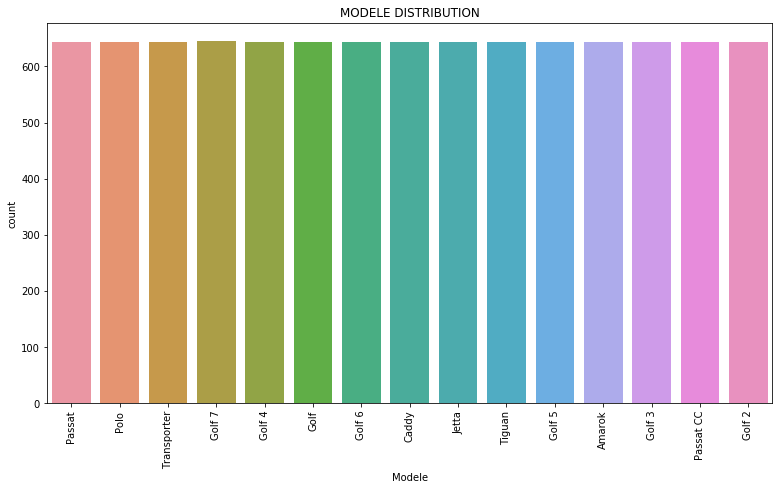

In [4]:
plt.figure(figsize=(13,7))
plt.title('MODELE DISTRIBUTION')
ax = sns.countplot(df['Modele'])
rotg = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [5]:
# Passat_Auto = df[df.Modele =='Passat CC']
# Passat_Auto.to_csv('Passat CC.csv', index=False)

In [6]:
# n=0
# for i in range(0,df['Marque'].count()):
#     if(df['Modele'][i] =='Passat CC'):
#         n=n+1
# print(n)

# **Feature engineering**

## **1) Encodage des variables qualitatives**

## a) Ordinal Encoder

### Variable Modele

In [7]:
DataFrame = df.copy()
DataFrame = DataFrame.drop('prix', axis=1)
DataFrame = DataFrame.drop('annee', axis=1)
DataFrame = DataFrame.drop('kilometrage', axis=1)
DataFrame = DataFrame.to_numpy()
type(DataFrame)

numpy.ndarray

In [8]:
DataFrame

array([['Volkswagen', 'Passat', 'Diesel'],
       ['Volkswagen', 'Polo', 'Essence'],
       ['Volkswagen', 'Passat', 'Diesel'],
       ...,
       ['Volkswagen', 'Passat CC', 'Essence'],
       ['Volkswagen', 'Passat CC', 'Hybride'],
       ['Volkswagen', 'Passat CC', 'Diesel']], dtype=object)

In [9]:
encoder = OrdinalEncoder()
DataFrame = encoder.fit_transform(DataFrame)

In [10]:
DataFrame = pd.DataFrame(DataFrame)
DataFrame.rename(columns={0 : 'Marque', 1: 'Modele', 2:'Carburant' }, inplace=True)

In [11]:
DataFrame

,Marque,Modele,Carburant
0,0.0,10.0,0.0
1,0.0,12.0,2.0
2,0.0,10.0,0.0
3,0.0,14.0,0.0
4,0.0,8.0,2.0
...,...,...,...
9656,0.0,11.0,0.0
9657,0.0,11.0,2.0
9658,0.0,11.0,2.0
9659,0.0,11.0,3.0


## b) One hot encoder

### Variable Modele

In [12]:
Modele=df["Modele"]
encoder = OneHotEncoder()
tr_Modele=encoder.fit_transform(Modele.values.reshape(-1,1))
tr_Modele.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
encoder.categories_

[array(['Amarok', 'Caddy', 'Golf', 'Golf 2', 'Golf 3', 'Golf 4', 'Golf 5',
        'Golf 6', 'Golf 7', 'Jetta', 'Passat', 'Passat CC', 'Polo',
        'Tiguan', 'Transporter'], dtype=object)]

In [14]:
Modele_df=pd.concat([pd.DataFrame(tr_Modele.toarray()
,Modele.index,columns=['Amarok', 'Caddy', 'Golf', 'Golf 2', 'Golf 3', 'Golf 4', 'Golf 5',
        'Golf 6', 'Golf 7', 'Jetta', 'Passat', 'Passat CC', 'Polo',
        'Tiguan', 'Transporter']),Modele],axis=1)

### Variable carburant

In [15]:
Carburant=df["carburant"]
encoder = OneHotEncoder()
tr_Carburant=encoder.fit_transform(Carburant.values.reshape(-1,1))
tr_Carburant.toarray()

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [16]:
encoder.categories_

[array(['Diesel', 'Electrique', 'Essence', 'Hybride'], dtype=object)]

In [17]:
Carburant_df=pd.concat([pd.DataFrame(tr_Carburant.toarray()
,Carburant.index,columns=['Diesel', 'Electrique', 'Essence', 'Hybride']),Carburant],axis=1)

## **2) Normalisation des variables quantitatives**

In [18]:
df['kilometrage'] = pd.to_numeric(df['kilometrage'])

In [19]:
DataFrame3 = pd.concat([DataFrame,df['annee'],df['kilometrage']],axis=1)

In [20]:
DataFrame3 = DataFrame3.to_numpy()

In [21]:
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

DataFrame3 = RobustScaler().fit_transform(DataFrame3)

# plt.scatter(arr[:,0], arr[:,1], alpha=0.5, label='original')
# plt.scatter(DataFrameR[:,0], DataFrameR[:,1], alpha=0.5, label='robust')
# plt.legend()
# plt.show()

In [22]:
DataFrame3

array([[ 0.        ,  0.375     ,  0.        ,  0.16666667,  0.28812827],
       [ 0.        ,  0.625     ,  1.        , -0.08333333, -0.10889554],
       [ 0.        ,  0.375     ,  0.        ,  0.08333333,  0.76269247],
       ...,
       [ 0.        ,  0.5       ,  1.        , -0.41666667,  0.83048736],
       [ 0.        ,  0.5       ,  1.5       , -0.5       , -0.76269247],
       [ 0.        ,  0.5       ,  0.        ,  0.        ,  0.25423082]])

In [23]:
DataFrame3 = pd.DataFrame(DataFrame3)

In [24]:
DataFrame3.rename(columns={0 : 'Marque', 1 : 'Modele', 2 : 'Carburant', 3 : 'annee' , 4 : 'kilometrage' }, inplace=True)

In [25]:
DataFrame3

,Marque,Modele,Carburant,annee,kilometrage
0,0.0,0.375,0.0,0.166667,0.288128
1,0.0,0.625,1.0,-0.083333,-0.108896
2,0.0,0.375,0.0,0.083333,0.762692
3,0.0,0.875,0.0,0.916667,-1.515970
4,0.0,0.125,1.0,-0.416667,-0.742354
...,...,...,...,...,...
9656,0.0,0.500,0.0,-0.083333,-0.016949
9657,0.0,0.500,1.0,-0.083333,-0.796590
9658,0.0,0.500,1.0,-0.416667,0.830487
9659,0.0,0.500,1.5,-0.500000,-0.762692


In [26]:
df.describe()

,prix,annee,kilometrage
count,9661.000000,9661.000000,9661.000000
mean,43.817653,14.058897,201.475056
std,72.241595,8.899377,116.109688
min,1.000000,0.000000,1.000000
25%,16.000000,8.000000,132.000000
50%,28.900000,11.000000,190.000000
75%,46.000000,20.000000,250.003000
max,800.000000,43.000000,999.999000


In [27]:
Q1_Kilometrage = np.percentile(df.kilometrage, 25)
Q3_Kilometrage = np.percentile(df.kilometrage, 75)

In [28]:
Q1_annee = np.percentile(df.annee, 25)
Q3_annee = np.percentile(df.annee, 75)

# **Feature selection**

## **1) Concaténation des données**

In [29]:
df['prix'] = pd.to_numeric(df['prix'])

In [30]:
DataFrame1 = pd.concat([DataFrame,DataFrame3['annee'],DataFrame3['kilometrage'],df['prix']],axis=1)
DataFrame1 = DataFrame1.drop(columns=["Marque"])

In [31]:
DataFrame2 = pd.concat([Modele_df.drop(columns=["Modele"]),Carburant_df.drop(columns=["carburant"]),DataFrame3['annee'],DataFrame3['kilometrage'],df['prix']],axis=1)

In [32]:
DataFrame3 = pd.concat([DataFrame3,df['prix']],axis=1)
DataFrame3 = DataFrame3.drop(columns=["Marque"])

- **DataFrame :** Contient les variable marque, modele et carburant avec Ordinal Encoder.
- **DataFrame1 :** Contient DataFrame et les variables année et kilométrage normalisés avec Robust Scaling.
- **DataFrame2 :** Contient les variable marque, modele et carburant avec One hot encoder et les variables année et kilométrage normalisés avec Robust Scaling.
- **DataFrame3 :** Contient DataFrame ainsi que tout les variable normalisés avec Robust Scaling méme celle qui ont subi l'Ordinal Encoder.

In [33]:
pd.set_option('display.max_row',111)      #Pour afficher plus de détails dans dtype
pd.set_option('display.max_columns',111)

# **Machine learning**

# **I) Train Test**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
n = DataFrame1.shape[0]
n

9661

## a) DataFrame1

In [36]:
y1 = DataFrame1['prix']
X1 = DataFrame1.drop('prix', axis=1) #axis=1 c'est pour indiquer les colonnes

In [37]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2)

## b) DataFrame2

In [38]:
y2 = DataFrame2['prix']
X2 = DataFrame2.drop('prix', axis=1) #axis=1 c'est pour indiquer les colonnes

In [39]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2)

## c) DataFrame3

In [40]:
y3 = DataFrame3['prix']
X3 = DataFrame3.drop('prix', axis=1) #axis=1 c'est pour indiquer les colonnes

In [41]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.2)

# **II) Modelisation**

## **1) RandomForestRegressor**

## a) DataFrame1

### i) Train test split

In [42]:
RandomForest1 = RandomForestRegressor(random_state=42)

In [43]:
RandomForest1.fit(X1_train, y1_train)

RandomForestRegressor(random_state=42)

In [44]:
RandomForest1.score(X1_test,y1_test)

0.8825618836909461

In [45]:
predictions = RandomForest1.predict(X1_test)

#### Les métriques

In [46]:
# model = sm.OLS(y1_test, X1_test).fit() 
# predictions = RandomForest1.predict(X1_test)

# print_model = model.summary(X1_test)
# print('R squared          : ',model.rsquared)
# print('adjusted R squared : ',model.rsquared_adj)

# modele = OLS(y1_test, X1_test).fit()
# print('AIC : ',modele.aic)
# print('BIC : ',modele.bic)

In [47]:
import math
print("AIC   : "+ str( n *math.log(mean_squared_error(predictions, y1_test)) + 2 * len(RandomForest1.feature_importances_)))
print("BIC   : "+ str( n *math.log(mean_squared_error(predictions, y1_test)) + len(RandomForest1.feature_importances_) * math.log(n) ))

AIC   : 61710.28060894641
BIC   : 61738.98401871248


In [48]:
print("MSE   : "+ str(mean_squared_error(predictions, y1_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y1_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y1_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y1_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y1_test)))
print("R²    : "+ str(r2_score(predictions, y1_test)))

MSE   : 593.9163567562667
RMSE  : 24.370399191565713
MSLE  : 0.10655073474089803
RMSLE : 0.32642110033038313
MAE   : 3.7877830130090246
R²    : 0.8843708755002504


### ii) Cross validation

In [49]:
cross_validate(RandomForest1, X1, y1, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([1.69152021, 1.50050998, 1.42313361, 1.81607962, 1.64963102]),
 'score_time': array([0.07276344, 0.05684948, 0.05684447, 0.04388261, 0.03985238]),
 'test_r2': array([0.61123655, 0.63788587, 0.76738152, 0.88134651, 0.76946304]),
 'test_neg_mean_absolute_error': array([-11.97370956, -11.32791824,  -8.92205015,  -8.30843381,
        -15.01649113])}

In [50]:
cross_val_score(RandomForest1, X1, y1, cv=5).mean()

0.733462698138645

In [51]:
cross_val_predict(RandomForest1, X1, y1, n_jobs=-1, verbose=0)

array([ 30.14  ,  39.259 ,  32.2325, ...,  49.127 , 333.18  ,  40.835 ])

## b) DataFrame2

In [52]:
RandomForest2 = RandomForestRegressor(random_state=42)

In [53]:
RandomForest2.fit(X2_train, y2_train) 

RandomForestRegressor(random_state=42)

In [54]:
RandomForest2.score(X2_test,y2_test)

0.8883654277481524

In [55]:
predictions = RandomForest2.predict(X2_test)

#### Les métriques

In [56]:
print("AIC   : "+ str( n *math.log(mean_squared_error(predictions, y2_test)) + 2 * len(RandomForest2.feature_importances_)))
print("BIC   : "+ str( n *math.log(mean_squared_error(predictions, y2_test)) + len(RandomForest2.feature_importances_) * math.log(n) ))

AIC   : 61249.543718170826
BIC   : 61400.236619442694


In [57]:
print("MSE   : "+ str(mean_squared_error(predictions, y2_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y2_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y2_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y2_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y2_test)))
print("R²    : "+ str(r2_score(predictions, y2_test)))

MSE   : 564.2677077824228
RMSE  : 23.754319770989504
MSLE  : 0.04006634864467189
RMSLE : 0.20016580288518787
MAE   : 2.5268841095020464
R²    : 0.8689127130462494


### ii) Cross validation

In [58]:
cross_validate(RandomForest2, X2, y2, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([2.15224743, 2.26794052, 2.68885612, 2.46345568, 2.3118217 ]),
 'score_time': array([0.07679653, 0.05485439, 0.06183481, 0.04986525, 0.04687238]),
 'test_r2': array([0.69806123, 0.64102688, 0.76703198, 0.89874024, 0.83480314]),
 'test_neg_mean_absolute_error': array([ -9.68216896, -11.66303593,  -8.83724754,  -7.1742874 ,
        -12.58083914])}

In [59]:
cross_val_score(RandomForest2, X2, y2, cv=5).mean()

0.7679326955151241

In [60]:
cross_val_predict(RandomForest2, X2, y2, n_jobs=-1, verbose=0)

array([ 28.104     ,  35.73      ,  32.5485    , ...,  53.672     ,
       335.27822727,  40.74      ])

### iii) Bagging

In [61]:
model = BaggingRegressor(base_estimator= RandomForest2, n_estimators= 100)

In [62]:
cross_validate(model, X2, y2, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([187.43731833, 199.48958015, 198.56206226, 212.98328161,
        215.2213285 ]),
 'score_time': array([6.88545656, 4.97775483, 5.03254437, 4.24663997, 4.04024124]),
 'test_r2': array([0.65616809, 0.41445273, 0.57243871, 0.73482797, 0.6669627 ]),
 'test_neg_mean_absolute_error': array([-10.83284872, -17.55534948, -13.70640573, -11.64328219,
        -17.73345385])}

In [63]:
cross_val_score(model, X2, y2, cv=5).mean()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Users\21620\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-63-85341c48d8cb>", line 1, in <module>
    cross_val_score(model, X2, y2, cv=5).mean()
  File "D:\Users\21620\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "D:\Users\21620\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 406, in cross_val_score
    error_score=error_score)
  File "D:\Users\21620\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "D:\Users\21620\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 248, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "D:\Users\21620\Anaconda3\lib\site-packages\joblib\parallel.py", line 924, in __call__
    while self.dispatch_one_batch

KeyboardInterrupt: 

In [ ]:
cross_val_predict(model, X2, y2, n_jobs=-1, verbose=0)

## c) DataFrame3

In [64]:
RandomForest3 = RandomForestRegressor()

In [65]:
RandomForest3.fit(X3_train, y3_train) 

RandomForestRegressor()

In [66]:
RandomForest3.score(X3_test,y3_test)

0.851252447892727

In [67]:
predictions = RandomForest3.predict(X3_test)

#### Les métriques

In [68]:
print("AIC   : "+ str( n *math.log(mean_squared_error(predictions, y3_test)) + 2 * len(RandomForest3.feature_importances_)))
print("BIC   : "+ str( n *math.log(mean_squared_error(predictions, y3_test)) + len(RandomForest3.feature_importances_) * math.log(n)))

AIC   : 65938.00340431019
BIC   : 65966.70681407626


In [69]:
print("MSE   : "+ str(mean_squared_error(predictions, y3_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y3_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y3_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y3_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y3_test)))
print("R²    : "+ str(r2_score(predictions, y3_test)))

MSE   : 919.9742295072009
RMSE  : 30.331076959237713
MSLE  : 0.07555841935049067
RMSLE : 0.27487891761735866
MAE   : 3.9404546228164725
R²    : 0.812006353702779


### ii) Cross validation

In [70]:
cross_validate(RandomForest3, X3, y3, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([0.79886246, 0.9529705 , 0.94100261, 0.95297146, 0.97690535]),
 'score_time': array([0.04288507, 0.02393603, 0.02293873, 0.01994658, 0.01695466]),
 'test_r2': array([0.60812823, 0.68095318, 0.76936998, 0.8671705 , 0.78522186]),
 'test_neg_mean_absolute_error': array([-11.95374962, -11.04491444,  -9.35174792,  -8.44374312,
        -13.90694857])}

In [71]:
cross_val_score(RandomForest3, X3, y3, cv=5).mean()

0.7489721520134474

In [72]:
cross_val_predict(RandomForest3, X3, y3, n_jobs=-1, verbose=0)

array([ 27.983     ,  39.434     ,  32.29583333, ...,  48.47175   ,
       314.7575    ,  41.24      ])

## **2) GradientBoostingRegressor**

## a) DataFrame1

In [73]:
GradientBoosting1 = GradientBoostingRegressor( n_estimators=500, max_depth=4, min_samples_split=5, learning_rate=0.01, loss='ls' )
GradientBoosting1.fit(X1_train, y1_train) 

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [74]:
GradientBoosting1.score(X1_test, y1_test) 

0.5277846567485543

In [75]:
predictions = GradientBoosting1.predict(X1_test) 

#### Les métriques

In [76]:
print("MSE   : "+ str(mean_squared_error(predictions, y1_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y1_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y1_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y1_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y1_test)))
print("R²    : "+ str(r2_score(predictions, y1_test)))

MSE   : 2388.1208681025723
RMSE  : 48.86840357636591
MSLE  : 0.377270187322155
RMSLE : 0.614223238995526
MAE   : 16.96719957549291
R²    : -0.19133002853494108


### ii) Cross validation

In [77]:
cross_validate(GradientBoosting1, X1, y1, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([1.66454935, 1.9108882 , 1.76128912, 1.8510499 , 1.93283176]),
 'score_time': array([0.01396275, 0.01196837, 0.01895094, 0.0119679 , 0.01097131]),
 'test_r2': array([0.24191711, 0.16125987, 0.07150047, 0.39721408, 0.77661713]),
 'test_neg_mean_absolute_error': array([-21.26667825, -20.58732054, -25.31831598, -22.59593608,
        -22.62712299])}

In [78]:
cross_val_score(GradientBoosting1, X1, y1, cv=5).mean()

0.3296288466748881

In [79]:
cross_val_predict(GradientBoosting1, X1, y1, n_jobs=-1, verbose=0)

array([ 32.66900101,  44.47729285,  34.99189365, ...,  47.49959576,
       420.10756387,  31.67240621])

## b) DataFrame2

In [80]:
GradientBoosting2 = GradientBoostingRegressor( n_estimators=500, max_depth=4, min_samples_split=5, learning_rate=0.01, loss='ls' )
GradientBoosting2.fit(X2_train, y2_train) 

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [81]:
GradientBoosting2.score(X2_test, y2_test) 

0.4869900417972268

In [82]:
predictions = GradientBoosting2.predict(X2_test) 

#### Les métriques

In [83]:
print("MSE   : "+ str(mean_squared_error(predictions, y2_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y2_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y2_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y2_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y2_test)))
print("R²    : "+ str(r2_score(predictions, y2_test)))

MSE   : 2593.0582914008014
RMSE  : 50.92208058790215
MSLE  : 0.36096821213753305
RMSLE : 0.6008063016792792
MAE   : 16.802316497921552
R²    : -0.751652728703976


### ii) Cross validation

In [84]:
cross_validate(GradientBoosting2, X2, y2, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([3.19645333, 3.05383253, 3.53359056, 3.22836661, 3.24532032]),
 'score_time': array([0.02094412, 0.01396275, 0.01196861, 0.01296473, 0.01296544]),
 'test_r2': array([0.22492856, 0.14199589, 0.11650276, 0.54800705, 0.78681589]),
 'test_neg_mean_absolute_error': array([-20.27117892, -21.19424723, -21.91861759, -20.3942872 ,
        -20.08254113])}

In [85]:
cross_val_score(GradientBoosting2, X2, y2, cv=5).mean()

0.363511755442803

In [86]:
cross_val_predict(GradientBoosting2, X2, y2, n_jobs=-1, verbose=0)

array([ 31.70539636,  44.73294204,  32.38897557, ...,  47.83928191,
       400.06799804,  32.62664486])

## c) DataFrame3

In [87]:
GradientBoosting3 = GradientBoostingRegressor( n_estimators=500, max_depth=4, min_samples_split=5, learning_rate=0.01, loss='ls' )
GradientBoosting3.fit(X3_train, y3_train) 

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [88]:
GradientBoosting3.score(X3_test, y3_test) 

0.43375596440302766

In [89]:
predictions = GradientBoosting3.predict(X3_test) 

#### Les métriques

In [90]:
print("MSE   : "+ str(mean_squared_error(predictions, y3_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y3_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y3_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y3_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y3_test)))
print("R²    : "+ str(r2_score(predictions, y3_test)))

MSE   : 3502.107516940455
RMSE  : 59.178606919565574
MSLE  : 0.42782517897582945
RMSLE : 0.6540834648390291
MAE   : 18.586044489474318
R²    : -0.724847128527081


### ii) Cross validation

In [91]:
cross_validate(GradientBoosting3, X3, y3, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([1.93981194, 1.62964129, 1.72634268, 2.00367165, 1.75535607]),
 'score_time': array([0.01395559, 0.01196766, 0.01296568, 0.01098013, 0.01196003]),
 'test_r2': array([0.24263442, 0.16125987, 0.07150047, 0.39721408, 0.77661713]),
 'test_neg_mean_absolute_error': array([-21.25390976, -20.58732054, -25.31831598, -22.59593608,
        -22.62712299])}

In [92]:
cross_val_score(GradientBoosting3, X3, y3, cv=5).mean()

0.3300056747891339

In [93]:
cross_val_predict(GradientBoosting3, X3, y3, n_jobs=-1, verbose=0)

array([ 32.66900101,  44.47729285,  34.99189365, ...,  47.49959576,
       420.10756387,  31.67240621])

## **3) XGBRegressor**

## a) DataFrame1

In [94]:
XGBRegressor1 = XGBRegressor(objective='reg:squarederror')
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(XGBRegressor1, X1_train, y1_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [95]:
XGBRegressor1 = XGBRegressor(objective='reg:squarederror')
XGBRegressor1.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
XGBRegressor1.score(X1_test, y1_test)

0.8976554610117251

In [97]:
predictions = XGBRegressor1.predict(X1_test)

#### Les métriques

In [98]:
print("MSE   : "+ str(mean_squared_error(predictions, y1_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y1_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y1_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y1_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y1_test)))
print("R²    : "+ str(r2_score(predictions, y1_test)))

MSE   : 517.5840488607171
RMSE  : 22.750473596404913
MSLE  : 0.1249408837903947
RMSLE : 0.3534697777609773
MAE   : 5.3052354021173525
R²    : 0.8941072028891454


### ii) Cross validation

In [99]:
cross_validate(XGBRegressor1, X1, y1, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([0.27127266, 0.27426386, 0.3739965 , 0.37698698, 0.2802465 ]),
 'score_time': array([0.01097083, 0.01100183, 0.00997329, 0.0100131 , 0.0110054 ]),
 'test_r2': array([0.56842764, 0.73419621, 0.83919873, 0.98334317, 0.98314862]),
 'test_neg_mean_absolute_error': array([-15.39864346,  -8.76056388,  -8.01665196,  -4.70720636,
         -7.3978861 ])}

In [100]:
cross_val_score(XGBRegressor1, X1, y1, cv=5).mean()

0.8216628753060592

In [101]:
cross_val_predict(XGBRegressor1, X1, y1, n_jobs=-1, verbose=0)

array([ 28.408535,  38.930515,  28.11068 , ...,  48.30895 , 496.30548 ,
        32.220284], dtype=float32)

## b) DataFrame2

In [102]:
XGBRegressor2 = XGBRegressor(objective='reg:squarederror')

In [103]:
XGBRegressor2.fit(X2_train, y2_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
XGBRegressor2.score(X2_test, y2_test)

0.8935530316643389

In [105]:
predictions = XGBRegressor2.predict(X2_test)

#### Les métriques

In [106]:
print("MSE   : "+ str(mean_squared_error(predictions, y2_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y2_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y2_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y2_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y2_test)))
print("R²    : "+ str(r2_score(predictions, y2_test)))

MSE   : 538.0464636675986
RMSE  : 23.195828583337967
MSLE  : 0.0541557899023664
RMSLE : 0.23271396585157153
MAE   : 3.8596827394512117
R²    : 0.8702635597854703


### ii) Cross validation

In [107]:
cross_validate(XGBRegressor2, X2, y2, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([0.87266874, 0.88466406, 0.68616486, 0.72805405, 0.72406435]),
 'score_time': array([0.01100636, 0.01096654, 0.01196861, 0.01097035, 0.00997257]),
 'test_r2': array([0.68873624, 0.79725362, 0.86515023, 0.99387904, 0.98295489]),
 'test_neg_mean_absolute_error': array([-11.00810385,  -6.65113914,  -6.14565297,  -3.41682551,
         -6.16754886])}

In [108]:
cross_val_score(XGBRegressor2, X2, y2, cv=5).mean()

0.8655948046698423

In [109]:
cross_val_predict(XGBRegressor2, X2, y2, n_jobs=-1, verbose=0)

array([ 28.39039 ,  39.36455 ,  28.908587, ...,  54.34071 , 495.50058 ,
        38.258434], dtype=float32)

### iii) Bagging

In [110]:
from sklearn.ensemble import BaggingRegressor

In [111]:
model = BaggingRegressor(base_estimator= XGBRegressor2, n_estimators= 100)

# model.fit(X2, y2)
# model.score(X2_test, y2_test)

In [112]:
cross_validate(model, X2, y2, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([90.73904586, 92.84741092, 91.07614446, 91.42421365, 89.31285882]),
 'score_time': array([1.11402249, 0.8488059 , 1.0252583 , 0.94846416, 1.0970664 ]),
 'test_r2': array([0.68311242, 0.62167659, 0.70884598, 0.88379198, 0.8292593 ]),
 'test_neg_mean_absolute_error': array([-11.2526033 , -13.42823742, -11.71780122,  -8.3967838 ,
        -13.46318893])}

In [ ]:
cross_val_score(model, X2, y2, cv=5).mean()

In [ ]:
cross_val_predict(model, X2, y2, n_jobs=-1, verbose=0)

## c) DataFrame3

In [113]:
XGBRegressor3 = XGBRegressor(objective='reg:squarederror')

In [114]:
XGBRegressor3.fit(X3_train, y3_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
XGBRegressor3.score(X3_test, y3_test)

0.8328698664240124

In [116]:
predictions = XGBRegressor3.predict(X3_test)

#### Les métriques

In [117]:
print("MSE   : "+ str(mean_squared_error(predictions, y3_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y3_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y3_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y3_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y3_test)))
print("R²    : "+ str(r2_score(predictions, y3_test)))

MSE   : 1033.6668650057527
RMSE  : 32.15068996158174
MSLE  : 0.10578468839607663
RMSLE : 0.3252455816703382
MAE   : 5.89301864705922
R²    : 0.7924216039290195


### ii) Cross validation

In [118]:
cross_validate(XGBRegressor3, X3, y3, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([0.30119324, 0.34707117, 0.32612658, 0.31515646, 0.30817533]),
 'score_time': array([0.00997329, 0.00997281, 0.00997305, 0.00997376, 0.01097083]),
 'test_r2': array([0.56842764, 0.73419621, 0.83919873, 0.98334317, 0.98314862]),
 'test_neg_mean_absolute_error': array([-15.39864346,  -8.76056388,  -8.01665196,  -4.70720636,
         -7.3978861 ])}

In [119]:
cross_val_score(XGBRegressor3, X3, y3, cv=5).mean()

0.8216628753060592

In [120]:
cross_val_predict(XGBRegressor3, X3, y3, n_jobs=-1, verbose=0)

array([ 28.408535,  38.930515,  28.11068 , ...,  48.30895 , 496.30548 ,
        32.220284], dtype=float32)

## **4) LightGBM**

## a) DataFrame1

In [121]:
lightgbm1 = lightgbm.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1, silent=True, importance_type='split')

In [122]:
lightgbm1.fit(X1_train, y1_train) 

LGBMRegressor()

In [123]:
lightgbm1.score(X1_test, y1_test) 

0.7681376118085204

In [124]:
predictions = lightgbm1.predict(X1_test) 

#### Les métriques

In [125]:
print("MSE   : "+ str(mean_squared_error(predictions, y1_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y1_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y1_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y1_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y1_test)))
print("R²    : "+ str(r2_score(predictions, y1_test)))

MSE   : 1172.590886089292
RMSE  : 34.24311443325931
MSLE  : 0.2562330979433545
RMSLE : 0.5061947233460208
MAE   : 11.138617222389096
R²    : 0.642961895948958


### ii) Cross validation

In [126]:
cross_validate(lightgbm1, X1, y1, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([0.17554545, 0.18949294, 0.20545268, 0.18550658, 0.17554545]),
 'score_time': array([0.05982447, 0.04088902, 0.03490376, 0.04786897, 0.05184531]),
 'test_r2': array([0.44824045, 0.15077558, 0.23695475, 0.4141303 , 0.38047783]),
 'test_neg_mean_absolute_error': array([-18.34675653, -22.74027189, -21.65980381, -20.60760711,
        -25.31817539])}

In [127]:
cross_val_score(lightgbm1, X1, y1, cv=5).mean()

0.3261157830004173

In [128]:
cross_val_predict(lightgbm1, X1, y1, n_jobs=-1, verbose=0)

array([ 27.23678211,  43.31679431,  43.23198555, ...,  48.30010239,
       128.45419373,  30.40136624])

## b) DataFrame2

In [129]:
lightgbm2 = lightgbm.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1, silent=True, importance_type='split')

In [130]:
lightgbm2.fit(X2_train, y2_train)

LGBMRegressor()

In [131]:
lightgbm2.score(X2_test, y2_test) 

0.7162939525687436

In [132]:
predictions = lightgbm2.predict(X2_test) 

#### Les métriques

In [133]:
print("MSE   : "+ str(mean_squared_error(predictions, y2_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y2_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y2_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y2_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y2_test)))
print("R²    : "+ str(r2_score(predictions, y2_test)))

MSE   : 1434.019567942554
RMSE  : 37.86845082575407
MSLE  : 0.23066226664877001
RMSLE : 0.48027311672502554
MAE   : 11.21120049106515
R²    : 0.5145924251937324


### ii) Cross validation

In [134]:
cross_validate(lightgbm2, X2, y2, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([0.26130199, 0.24335074, 0.26628757, 0.27626276, 0.24334407]),
 'score_time': array([0.04487967, 0.04089236, 0.04886985, 0.03789759, 0.04488015]),
 'test_r2': array([0.41493265, 0.14616106, 0.31072278, 0.37450172, 0.25484688]),
 'test_neg_mean_absolute_error': array([-18.37037416, -22.47896292, -19.46012212, -20.82837511,
        -24.80180423])}

In [135]:
cross_val_score(lightgbm2, X2, y2, cv=5).mean()

0.30023301833603044

In [136]:
cross_val_predict(lightgbm2, X2, y2, n_jobs=-1, verbose=0)

array([28.06511367, 39.75860448, 30.42027683, ..., 79.31414296,
       99.97281241, 31.91002931])

## c) DataFrame3

In [137]:
lightgbm3 = lightgbm.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1, silent=True, importance_type='split')

In [138]:
lightgbm3.fit(X3_train, y3_train)

LGBMRegressor()

In [139]:
lightgbm3.score(X3_test, y3_test)

0.7097779841801382

In [140]:
predictions = lightgbm3.predict(X3_test)

#### Les métriques

In [141]:
print("MSE   : "+ str(mean_squared_error(predictions, y3_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y3_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y3_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y3_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y3_test)))
print("R²    : "+ str(r2_score(predictions, y3_test)))

MSE   : 1794.9658438570657
RMSE  : 42.36703723246488
MSLE  : 0.2545084237175574
RMSLE : 0.5044882790685601
MAE   : 11.602344432076096
R²    : 0.46135744638443543


### ii) Cross validation

In [142]:
cross_validate(lightgbm3, X3, y3, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([0.0917182 , 0.07480049, 0.10671759, 0.0927515 , 0.1056819 ]),
 'score_time': array([0.02593088, 0.0159564 , 0.02094364, 0.02293992, 0.01695538]),
 'test_r2': array([0.44824045, 0.15077558, 0.23695475, 0.4141303 , 0.38047783]),
 'test_neg_mean_absolute_error': array([-18.34675653, -22.74027189, -21.65980381, -20.60760711,
        -25.31817539])}

In [143]:
cross_val_score(lightgbm3, X3, y3, cv=5).mean()

0.3261157830004173

In [144]:
cross_val_predict(lightgbm3, X3, y3, n_jobs=-1, verbose=0)

array([ 27.23678211,  43.31679431,  43.23198555, ...,  48.30010239,
       128.45419373,  30.40136624])

## **5) Catboost**

## a) DataFrame1

In [145]:
CatBoostRegressor1 = CatBoostRegressor(verbose=0, n_estimators=100)
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(CatBoostRegressor1, X1_train, y1_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [146]:
CatBoostRegressor1.fit(X1_train, y1_train)

In [147]:
CatBoostRegressor1.score(X1_test, y1_test)

0.8596943338347125

In [148]:
predictions = CatBoostRegressor1.predict(X1_test)

#### Les métriques

In [149]:
print("MSE   : "+ str(mean_squared_error(predictions, y1_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y1_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y1_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y1_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y1_test)))
print("R²    : "+ str(r2_score(predictions, y1_test)))

MSE   : 709.5637489778461
RMSE  : 26.637637826538715
MSLE  : 0.24002006407923732
RMSLE : 0.4899184259437864
MAE   : 9.464675962033647
R²    : 0.8184645224258239


### ii) Cross validation

In [150]:
cross_validate(CatBoostRegressor1, X1, y1, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([1.67058396, 1.89199138, 1.86805606, 1.87104726, 1.87603521]),
 'score_time': array([0.17253995, 0.00598359, 0.01097226, 0.01196885, 0.00897908]),
 'test_r2': array([0.55516215, 0.34725648, 0.37917943, 0.84130705, 0.84241587]),
 'test_neg_mean_absolute_error': array([-17.34888723, -17.23498687, -18.09022124, -12.64043281,
        -19.628215  ])}

In [151]:
cross_val_score(CatBoostRegressor1, X1, y1, cv=5).mean()

0.5930641959320202

In [152]:
cross_val_predict(CatBoostRegressor1, X1, y1, n_jobs=-1, verbose=0)

array([ 28.5983812 ,  34.3624315 ,  32.28432867, ...,  40.62516233,
       479.02550682,  31.51304238])

## b) DataFrame2

In [153]:
CatBoostRegressor2 = CatBoostRegressor(verbose=0, n_estimators=100)

In [154]:
CatBoostRegressor2.fit(X2_train, y2_train)

In [155]:
CatBoostRegressor2.score(X2_test, y2_test)

0.8526829944322163

In [156]:
predictions = CatBoostRegressor2.predict(X2_test)

#### Les métriques

In [157]:
print("MSE   : "+ str(mean_squared_error(predictions, y2_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y2_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y2_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y2_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y2_test)))
print("R²    : "+ str(r2_score(predictions, y2_test)))

MSE   : 744.6280070081779
RMSE  : 27.287872892700484
MSLE  : 0.17860149480791704
RMSLE : 0.4226127007177104
MAE   : 8.034798685632325
R²    : 0.7905813426740715


### ii) Cross validation

In [158]:
cross_validate(CatBoostRegressor2, X2, y2, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([1.28755784, 1.16089535, 1.31547594, 1.40923023, 1.25963116]),
 'score_time': array([0.0179522 , 0.07978678, 0.02194118, 0.00598359, 0.04687476]),
 'test_r2': array([0.69697375, 0.47946564, 0.60217017, 0.93349954, 0.92997481]),
 'test_neg_mean_absolute_error': array([-14.87254931, -15.25072165, -13.52644615,  -9.60568651,
        -11.60607992])}

In [159]:
cross_val_score(CatBoostRegressor2, X2, y2, cv=5).mean()

0.7284167837149569

In [160]:
cross_val_predict(CatBoostRegressor2, X2, y2, n_jobs=-1, verbose=0)

array([ 28.70594338,  42.22491451,  28.30344165, ...,  43.56357089,
       478.55712264,  37.89926414])

## c) DataFrame3

In [161]:
CatBoostRegressor3 = CatBoostRegressor(verbose=0, n_estimators=100)

In [162]:
CatBoostRegressor3.fit(X3_train, y3_train)

In [163]:
CatBoostRegressor3.score(X3_test, y3_test)

0.784975011771095

In [164]:
predictions = CatBoostRegressor3.predict(X3_test)

#### Les métriques

In [165]:
print("MSE   : "+ str(mean_squared_error(predictions, y3_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y3_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y3_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y3_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y3_test)))
print("R²    : "+ str(r2_score(predictions, y3_test)))

MSE   : 1329.8870809518994
RMSE  : 36.467616880623
MSLE  : 0.2547504246902775
RMSLE : 0.504728070043937
MAE   : 10.231520068125713
R²    : 0.6624428778342357


### ii) Cross validation

In [166]:
cross_validate(CatBoostRegressor3, X3, y3, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)

{'fit_time': array([1.1369586 , 1.39327407, 1.43416548, 1.30949831, 1.33044243]),
 'score_time': array([0.1017282 , 0.01396227, 0.00398946, 0.03191471, 0.0339098 ]),
 'test_r2': array([0.55516215, 0.34725648, 0.37917943, 0.84130705, 0.84241587]),
 'test_neg_mean_absolute_error': array([-17.34888723, -17.23498687, -18.09022124, -12.64043281,
        -19.628215  ])}

In [167]:
cross_val_score(CatBoostRegressor3, X3, y3, cv=5).mean()

0.5930641959320202

In [168]:
cross_val_predict(CatBoostRegressor3, X3, y3, n_jobs=-1, verbose=0)

array([ 28.5983812 ,  34.3624315 ,  32.28432867, ...,  40.62516233,
       479.02550682,  31.51304238])

## 6) NGBoost

## a) DataFrame1

In [169]:
ngb1 = NGBoost(Base=default_tree_learner, Dist=Normal, natural_gradient=True,verbose=False)

In [170]:
ngb1.fit(X1_train, y1_train)

In [171]:
ngb1.score(X1_test, y1_test)

4.359634525604506

In [172]:
predictions = ngb1.predict(X1_test)

#### Les métriques

In [173]:
print("MSE   : "+ str(mean_squared_error(predictions, y1_test)))
print("RMSE  : "+ str(np.sqrt(mean_squared_error(predictions, y1_test))))
print("MSLE  : "+ str(mean_squared_log_error(abs(predictions), abs(y1_test))))
print("RMSLE : "+ str(np.sqrt(mean_squared_log_error(abs(predictions), abs(y1_test)))))
print("MAE   : "+ str(mean_absolute_error(predictions, y1_test)))
print("R²    : "+ str(r2_score(predictions, y1_test)))

MSE   : 2507.761108522377
RMSE  : 50.07755094373503
MSLE  : 0.40464962298215523
RMSLE : 0.6361207613198576
MAE   : 17.540915599670047
R²    : -0.28855897721050017


## b) DataFrame2

In [174]:
ngb2 = NGBoost(Base=default_tree_learner, Dist=Normal, natural_gradient=True,verbose=False)
ngb2.fit(X2_train, y2_train)

In [175]:
ngb2.score(X2_test, y2_test)

4.260012152554634

## c) DataFrame3

In [176]:
ngb3 = NGBoost(Base=default_tree_learner, Dist=Normal, natural_gradient=True,verbose=False)
ngb3.fit(X3_train, y3_train)

In [177]:
ngb3.score(X3_test, y3_test)

4.4679833938051745

## **7) ADABoost**

## a) DataFrame1

In [178]:
AdaBoostRegressor1 = AdaBoostRegressor(random_state=0, n_estimators=100)
AdaBoostRegressor1.fit(X1_train, y1_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [179]:
AdaBoostRegressor1.score(X1_test, y1_test)

-0.10765317622072468

## b) DataFrame2

In [180]:
AdaBoostRegressor2 = AdaBoostRegressor(random_state=0, n_estimators=100)
AdaBoostRegressor2.fit(X2_train, y2_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [181]:
AdaBoostRegressor2.score(X2_test, y2_test)

-0.21686017046646655

## c) DataFrame3

In [182]:
AdaBoostRegressor3 = AdaBoostRegressor(random_state=0, n_estimators=100)
AdaBoostRegressor3.fit(X3_train, y3_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [183]:
AdaBoostRegressor3.score(X3_test, y3_test)

0.2276063947225433

## **8) Linear regression**

## a) DataFrame1

In [184]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [185]:
model.score(X1_test, y1_test)

0.10166147871393671

## b) DataFrame2

In [186]:
model = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

In [187]:
model.score(X2_test, y2_test)

0.22373901763536974

## c) DataFrame3

In [188]:
model = LinearRegression()
model.fit(X3_train, y3_train)

LinearRegression()

In [189]:
model.score(X3_test, y3_test)

0.09275217485189946

## **9) Ridge**

## a) DataFrame1

In [190]:
modelRidge = Ridge(alpha=1.0)
modelRidge.fit(X1_train, y1_train)

Ridge()

In [191]:
modelRidge.score(X1_test,y1_test)

0.1016588835125416

## b) DataFrame2

In [192]:
modelRidge = Ridge(alpha=1.0)
modelRidge.fit(X2_train, y2_train)

Ridge()

In [193]:
modelRidge.score(X2_test,y2_test)

0.22346653814552508

## c) DataFrame3

In [194]:
modelRidge = Ridge(alpha=1.0)
modelRidge.fit(X3_train, y3_train)

Ridge()

In [195]:
modelRidge.score(X3_test,y3_test)

0.0927504719510227

## III) stacking_regressor

#### i/ DataFrame1

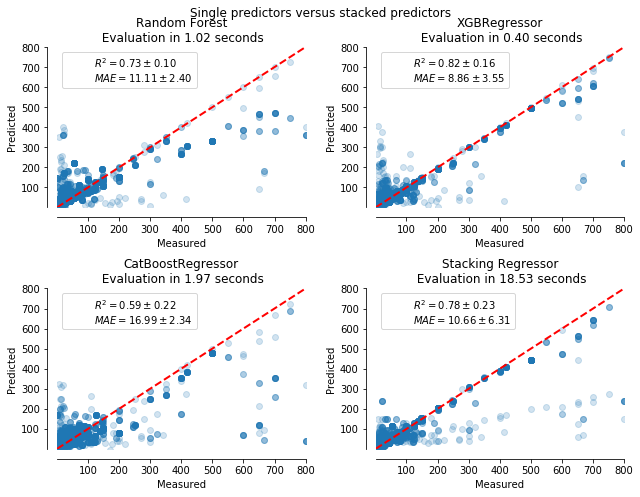

In [196]:
cat_cols = X1.columns[X1.dtypes == 'O']
num_cols = X1.columns[X1.dtypes == 'float64']
#categories = [ X1_train[column].unique() for column in X1_train[cat_cols] ]


XGBRegressor = XGBRegressor(objective='reg:squarederror')
RandomForestRegressor = RandomForestRegressor(random_state=42)
CatBoostRegressor = CatBoostRegressor(verbose=0, n_estimators=100)

estimators = [('Random Forest', RandomForestRegressor),
              ('XGBRegressor', XGBRegressor),
              ('CatBoostRegressor', CatBoostRegressor)]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())


def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor', stacking_regressor)]):
    start_time = time.time()
    score = cross_validate(est, X1, y1, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time
    y_pred = cross_val_predict(est, X1, y1, n_jobs=-1, verbose=0)

    plot_regression_results(ax, y1, y_pred, name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])), elapsed_time)

plt.suptitle('Single predictors versus stacked predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

#### ii/ DataFrame2

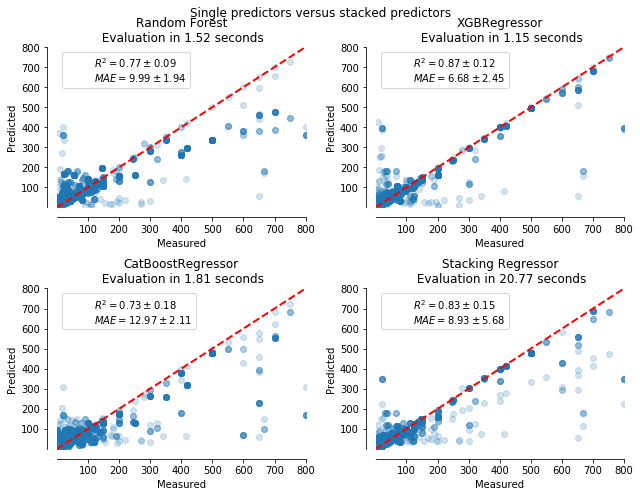

In [199]:
cat_cols = X2.columns[X2.dtypes == 'O']
num_cols = X2.columns[X2.dtypes == 'float64']
#categories = [ X1_train[column].unique() for column in X1_train[cat_cols] ]


XGBRegressor = XGBRegressor(objective='reg:squarederror')
RandomForestRegressor = RandomForestRegressor(random_state=42)
CatBoostRegressor = CatBoostRegressor(verbose=0, n_estimators=100)

estimators = [('Random Forest', RandomForestRegressor),
              ('XGBRegressor', XGBRegressor),
              ('CatBoostRegressor', CatBoostRegressor)]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())


def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor', stacking_regressor)]):
    start_time = time.time()
    score = cross_validate(est, X2, y2, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time
    y_pred = cross_val_predict(est, X2, y2, n_jobs=-1, verbose=0)

    plot_regression_results(ax, y2, y_pred, name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])), elapsed_time)

plt.suptitle('Single predictors versus stacked predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

#### iii/ DataFrame3

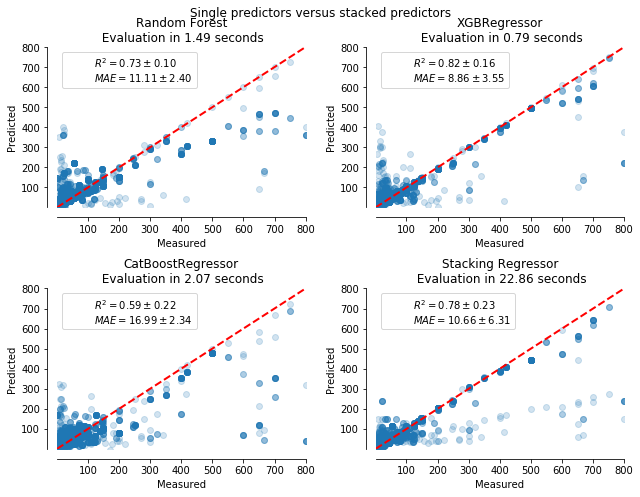

In [200]:
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict

cat_cols = X3.columns[X3.dtypes == 'O']
num_cols = X3.columns[X3.dtypes == 'float64']
#categories = [ X1_train[column].unique() for column in X1_train[cat_cols] ]


XGBRegressor = XGBRegressor(objective='reg:squarederror')
RandomForestRegressor = RandomForestRegressor(random_state=42)
CatBoostRegressor = CatBoostRegressor(verbose=0, n_estimators=100)

estimators = [('Random Forest', RandomForestRegressor),
              ('XGBRegressor', XGBRegressor),
              ('CatBoostRegressor', CatBoostRegressor)]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())


def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor', stacking_regressor)]):
    start_time = time.time()
    score = cross_validate(est, X3, y3, scoring=['r2', 'neg_mean_absolute_error'], n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time
    y_pred = cross_val_predict(est, X3, y3, n_jobs=-1, verbose=0)

    plot_regression_results(ax, y3, y_pred, name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])), elapsed_time)

plt.suptitle('Single predictors versus stacked predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# **IV) Courbe Roc

# deployment

In [201]:
import pandas as pd
Brands = pd.read_csv('Brands.csv')

In [202]:
Marque=[]
for i in range(0,Brands['name'].count()):
    Marque.append(Brands['name'][i])

In [203]:
VW_Modele=['Amarok', 'Caddy', 'Golf', 'Golf 2', 'Golf 3', 'Golf 4', 'Golf 5',
        'Golf 6', 'Golf 7', 'Jetta', 'Passat', 'Passat CC', 'Polo',
        'Tiguan', 'Transporter']

## a) Dataframe2

In [204]:
DataFrame2

,Amarok,Caddy,Golf,Golf 2,Golf 3,Golf 4,Golf 5,Golf 6,Golf 7,Jetta,Passat,Passat CC,Polo,Tiguan,Transporter,Diesel,Electrique,Essence,Hybride,annee,kilometrage,prix
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166667,0.288128,27.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.083333,-0.108896,24.3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.083333,0.762692,35.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.916667,-1.515970,13.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.416667,-0.742354,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.083333,-0.016949,44.0
9657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.083333,-0.796590,200.0
9658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.416667,0.830487,55.0
9659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.500000,-0.762692,500.0


In [205]:
X = DataFrame2.copy()

In [206]:
for i in range(0,X['kilometrage'].count()):
    X.drop(i,0,inplace=True)

In [207]:
X.loc[0]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [208]:
X

,Amarok,Caddy,Golf,Golf 2,Golf 3,Golf 4,Golf 5,Golf 6,Golf 7,Jetta,Passat,Passat CC,Polo,Tiguan,Transporter,Diesel,Electrique,Essence,Hybride,annee,kilometrage,prix
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import os
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_daq as daq

app = dash.Dash(__name__)
server = app.server
app.layout = html.Div([
    html.H2('Veuillez insérer les coordonnées de votre voiture'),
    
    html.H4('Marque :'),
    dcc.Dropdown(id='Marque', options=[{'label': i, 'value': i} for i in Marque ]), 
    html.Div(id='display-Marque'),
    
    html.H4('Modele :'),
    dcc.Dropdown(id='Modele', options=[{'label': i, 'value': i} for i in VW_Modele ]), 
    html.Div(id='display-Modele'),
    
    html.H4('Carburant :'),
    dcc.Dropdown(id='Carburant', options=[{'label': i, 'value': i} for i in ['Diesel', 'Electrique', 'Essence', 'GPL', 'Hybride']]), 
    html.Div(id='display-Carburant'),
    
    html.H4('Age de la voiture :'),
    dcc.Input(id='Age', value=0),
    html.Div(id='display-Age'),
    
    html.H4('Nombre de kilométrage :'),
    dcc.Input(id='Kilometrage', value=0),
    html.Div(id='display-Kilometrage'),
    
    
    html.H4('Prix estimé :'),
    html.Div(id='display-Prix'),
    
    
])


@app.callback(dash.dependencies.Output('display-Marque', 'children'),
              [dash.dependencies.Input('Marque', 'value')])
def display_value(value):
    return 'You have selected "{}"'.format(value)

@app.callback(dash.dependencies.Output('display-Modele', 'children'),
              [dash.dependencies.Input('Modele', 'value')])
def display_Modele(value):
    if(value == 'Amarok'):
        X.loc[0]=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Caddy'):
        X.loc[0]=[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Golf'):
        X.loc[0]=[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Golf 2'):
        X.loc[0]=[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Golf 3'):
        X.loc[0]=[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Golf 4'):
        X.loc[0]=[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Golf 5'):
        X.loc[0]=[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Golf 6'):
        X.loc[0]=[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Golf 7'):
        X.loc[0]=[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Jetta'):
        X.loc[0]=[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Passat'):
        X.loc[0]=[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Passat CC'):
        X.loc[0]=[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Polo'):
        X.loc[0]=[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Tiguan'):
        X.loc[0]=[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    elif(value == 'Transporter'):
        X.loc[0]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['annee'][0],X['kilometrage'][0],X['prix'][0]]
    return 'You have selected "{}"'.format(value)

@app.callback(dash.dependencies.Output('display-Carburant', 'children'),
              [dash.dependencies.Input('Carburant', 'value')])
def display_Modele(value):
    if(value == 'Diesel'):
        X.loc[0,'Diesel'] = 1
        X.loc[0,'Electrique'] = 0
#         X.loc[0,'GPL'] = 0
        X.loc[0,'Hybride'] = 0
        X.loc[0,'Essence'] = 0
    elif(value == 'Electrique'):
        X.loc[0,'Diesel'] = 0
        X.loc[0,'Electrique'] = 1
#         X.loc[0,'GPL'] = 0
        X.loc[0,'Hybride'] = 0
        X.loc[0,'Essence'] = 0
    elif(value == 'GPL'):
        X.loc[0,'Diesel'] = 0
        X.loc[0,'Electrique'] = 0
#         X.loc[0,'GPL'] = 1
        X.loc[0,'Hybride'] = 0
        X.loc[0,'Essence'] = 0
    elif(value == 'Hybride'):
        X.loc[0,'Diesel'] = 0
        X.loc[0,'Electrique'] = 0
#         X.loc[0,'GPL'] = 0
        X.loc[0,'Hybride'] = 1
        X.loc[0,'Essence'] = 0
    elif(value == 'Essence'):
        X.loc[0,'Diesel'] = 0
        X.loc[0,'Electrique'] = 0
#         X.loc[0,'GPL'] = 0
        X.loc[0,'Hybride'] = 0
        X.loc[0,'Essence'] = 1
    return 'You have selected "{}"'.format(value)


@app.callback(dash.dependencies.Output('display-Age', 'children'),
              [dash.dependencies.Input('Age', 'value')])
def display_Modele(value):
    Annee = (int(value) - Q1_annee) / (Q3_annee - Q1_annee)
    X.loc[0, 'annee'] = Annee
    return 'You have selected "{}"'.format(Annee)

@app.callback(dash.dependencies.Output('display-Kilometrage', 'children'),
              [dash.dependencies.Input('Kilometrage', 'value')])
def display_Modele(value):
    Kilometrage = int(value) / 100
    Kilometrage = (Kilometrage - Q1_Kilometrage ) / (Q3_Kilometrage - Q1_Kilometrage)
    X.loc[0, 'kilometrage'] = Kilometrage
    return 'You have selected "{}"'.format(Kilometrage)

@app.callback(dash.dependencies.Output('display-Prix', 'children'),
              [dash.dependencies.Input('Kilometrage', 'value')])
def display_Modele(value):
    ypred = pd.DataFrame({'pred_lin_regr': pd.Series(RandomForest.predict(X))})
    return 'You have selected "{}"'.format(ypred)



if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/



INFO:__main__: Warning: This is a development server. Do not use app.run_server


 in production, use a production WSGI server like gunicorn instead.



INFO:__main__: in production, use a production WSGI server like gunicorn instead.



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [17/Sep/2020 23:45:52] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Sep/2020 23:45:52] "GET /_dash-component-suites/dash_renderer/react@16.v1_6_0m1598259426.13.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Sep/2020 23:45:52] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_6_0m1598259426.8.7.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Sep/2020 23:45:52] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_6_0m1598259426.7.2.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Sep/2020 23:45:52] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_6_0m1598259426.13.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Sep/2020 23:45:52] "GET /_dash-component-suites/dash_core_components/dash_core_components.v1_10_2m1598259429.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Sep/2020 23:45:52] "GET /_dash-component-suites/das

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "D:\Users\21620\Anaconda3\lib\site-packages\dash\dash.py", line 1050, in dispatch
    response.set_d

ERROR:__main__:Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "D:\Users\21620\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "D:\Users\21620\Anaconda3\lib\site-packages\dash\dash.py", line 1050, in dispatch
   

In [96]:
X = X.drop('prix', axis=1)

In [97]:
X

,Amarok,Caddy,Golf,Golf 2,Golf 3,Golf 4,Golf 5,Golf 6,Golf 7,Jetta,Passat,Passat CC,Polo,Tiguan,Transporter,Diesel,Electrique,Essence,Hybride,annee,kilometrage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.25,3.118565


In [98]:
ypred = pd.DataFrame({'pred_lin_regr': pd.Series(RandomForest2.predict(X))})

In [99]:
ypred 

,pred_lin_regr
0,32.711023


https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor3-python-scikit.pdf

In [ ]:
import os
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_daq as daq
from dash.dependencies import Input, Output


app = dash.Dash(__name__)
server = app.server
app.layout = html.Div([
    html.H2('Veuillez insérer les coordonnées de votre voiture'),
    
    html.H4('Marque :'),
    dcc.Dropdown(id='Marque', options=[{'label': i, 'value': i} for i in Marque ]), 
    html.Div(id='display-Marque'),
    
    html.H4('Modele :'),
    dcc.Dropdown(id='Modele', options=[{'label': i, 'value': i} for i in VW_Modele ]), 
    html.Div(id='display-Modele'),
    
    html.H4('Carburant :'),
    dcc.Dropdown(id='Carburant', options=[{'label': i, 'value': i} for i in ['Diesel', 'Electrique', 'Essence', 'GPL', 'Hybride']]), 
    html.Div(id='display-Carburant'),
    
    html.H4('Age de la voiture :'),
    dcc.Input(id='Age', value=0),
    html.Div(id='display-Age'),
    
    html.H4('Nombre de kilométrage :'),
    dcc.Input(id='Kilometrage', value=0),
    html.Div(id='display-Kilometrage'),
    
    
    html.H4('Prix estimé :'),
    html.Div(id='display-Prix'),
    
    
])


@app.callback(dash.dependencies.Output('display-Marque', 'children'),
              [dash.dependencies.Input('Marque', 'value')])
def display_value(value):
    return 'You have selected "{}"'.format(value)

@app.callback(dash.dependencies.Output('display-Modele', 'children'),
              [dash.dependencies.Input('Modele', 'value')])
def display_Modele(value):
    if(value == 'Amarok'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Beetle'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Bora'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'CC'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Caddy'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]        
    elif(value == 'Caravelle'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Coccinelle'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Combi'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Crafter' ):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Eos' ):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Fox'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Golf'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Golf 2'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Golf 3'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Golf 4'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Golf 5'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Golf 6'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Golf 7'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Golf Plus'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Jetta' ):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'LT' ):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Lupo'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'New Beetle'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Passat'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Passat CC'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Polo'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Scirocco'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Sharan'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Tiguan'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Touareg'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Touran'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Transporter' ):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Up'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]
    elif(value == 'Vento'):
        X.loc[0]=[X['prix'][0],X['annee'][0],X['kilometrage'][0],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,X['Diesel'][0],X['Electrique'][0],X['Essence'][0],X['Hybride'][0],X['GPL'][0]]

    return 'You have selected "{}"'.format(value)

@app.callback(dash.dependencies.Output('display-Carburant', 'children'),
              [dash.dependencies.Input('Carburant', 'value')])
def display_Modele(value):
    if(value == 'Diesel'):
        X.loc[0,'Diesel'] = 1
        X.loc[0,'Electrique'] = 0
        X.loc[0,'GPL'] = 0
        X.loc[0,'Hybride'] = 0
        X.loc[0,'Essence'] = 0
    elif(value == 'Electrique'):
        X.loc[0,'Diesel'] = 0
        X.loc[0,'Electrique'] = 1
        X.loc[0,'GPL'] = 0
        X.loc[0,'Hybride'] = 0
        X.loc[0,'Essence'] = 0
    elif(value == 'GPL'):
        X.loc[0,'Diesel'] = 0
        X.loc[0,'Electrique'] = 0
        X.loc[0,'GPL'] = 1
        X.loc[0,'Hybride'] = 0
        X.loc[0,'Essence'] = 0
    elif(value == 'Hybride'):
        X.loc[0,'Diesel'] = 0
        X.loc[0,'Electrique'] = 0
        X.loc[0,'GPL'] = 0
        X.loc[0,'Hybride'] = 1
        X.loc[0,'Essence'] = 0
    elif(value == 'Essence'):
        X.loc[0,'Diesel'] = 0
        X.loc[0,'Electrique'] = 0
        X.loc[0,'GPL'] = 0
        X.loc[0,'Hybride'] = 0
        X.loc[0,'Essence'] = 1
    return 'You have selected "{}"'.format(value)


@app.callback(dash.dependencies.Output('display-Age', 'children'),
              [dash.dependencies.Input('Age', 'value')])
def display_Modele(value):
    Annee = (int(value) - Annee_mean) / Annee_sd
    X.loc[0, 'annee'] = Annee
    return 'You have selected "{}"'.format(Annee)

@app.callback(dash.dependencies.Output('display-Kilometrage', 'children'),
              [dash.dependencies.Input('Kilometrage', 'value')])
def display_Modele(value):
    Kilometrage = int(value) / 100
    Kilometrage = (Kilometrage - Kilometrage_mean) / Kilometrage_sd
    X.loc[0, 'kilometrage'] = Kilometrage
    return 'You have selected "{}"'.format(Kilometrage)

@app.callback(dash.dependencies.Output('display-Prix', 'children'),
              [dash.dependencies.Input('Kilometrage', 'value')])
def display_Modele(value):
    ypred = pd.DataFrame({'pred_lin_regr': pd.Series(RandomForest.predict(X))})
    return 'You have selected "{}"'.format(ypred)



if __name__ == '__main__':
    app.run_server(debug=False)

In [102]:
df

,Marque,Modele,prix,annee,kilometrage,carburant
0,Volkswagen,Passat,27.0,13,224.000,Diesel
1,Volkswagen,Polo,24.3,10,177.150,Essence
2,Volkswagen,Passat,35.0,12,280.000,Diesel
3,Volkswagen,Transporter,13.5,22,11.111,Diesel
4,Volkswagen,Golf 7,45.0,6,102.400,Essence
...,...,...,...,...,...,...
9656,Volkswagen,Passat CC,44.0,10,188.000,Diesel
9657,Volkswagen,Passat CC,200.0,10,96.000,Essence
9658,Volkswagen,Passat CC,55.0,6,288.000,Essence
9659,Volkswagen,Passat CC,500.0,5,100.000,Hybride


- https://benalexkeen.com/feature-scaling-with-scikit-learn/
- http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Python_Regression_Logistique.pdf
- https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor3-python-scikit.pdf
- https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/
- https://towardsdatascience.com/ngboost-explained-comparison-to-lightgbm-and-xgboost-fda510903e53

In [2]:
import os
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_daq as daq

app = dash.Dash(__name__)
server = app.server
app.layout = html.Div([
    html.H2('Veuillez insérer les coordonnées de votre voiture'),
    
#     html.H4('Marque :'),
#     dcc.Dropdown(id='Marque', options=[{'label': i, 'value': i} for i in Marque ]), 
#     html.Div(id='display-Marque'),
    
#     html.H4('Modele :'),
#     dcc.Dropdown(id='Modele', options=[{'label': i, 'value': i} for i in VW_Modele ]), 
#     html.Div(id='display-Modele'),
    
    html.H4('Carburant :'),
    dcc.Dropdown(id='Carburant', options=[{'label': i, 'value': i} for i in ['Diesel', 'Electrique', 'Essence', 'GPL', 'Hybride']]), 
    html.Div(id='display-Carburant'),
    
    html.H4('Age de la voiture :'),
    dcc.Input(id='Age', value=0),
    html.Div(id='display-Age'),
    
    html.H4('Nombre de kilométrage :'),
    dcc.Input(id='Kilometrage', value=0),
    html.Div(id='display-Kilometrage'),
    
    
    html.H4('Prix estimé :'),
    html.Div(id='display-Prix'),
    
    
])







if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Sep/2020 14:51:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2020 14:51:24] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2020 14:51:24] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2020 14:51:24] "GET /_favicon.ico?v=1.14.0 HTTP/1.1" 200 -
